### EXERCISE: Who likes it? (6 kyu)

You probably know the "like" system from Facebook and other pages. People can "like" blog posts, pictures or other items. We want to create the text that should be displayed next to such an item.

Implement the function which takes an array containing the names of people that like an item. It must return the display text as shown in the examples:

[]                                -->  "no one likes this"
["Peter"]                         -->  "Peter likes this"
["Jacob", "Alex"]                 -->  "Jacob and Alex like this"
["Max", "John", "Mark"]           -->  "Max, John and Mark like this"
["Alex", "Jacob", "Mark", "Max"]  -->  "Alex, Jacob and 2 others like this"

Note: For 4 or more names, the number in "and 2 others" simply increases.

#### MY SOLUTION

In [5]:
def likes(names):
    length = len(names)

    if length == 0:
        return "no one likes this"

    if length == 1:
        return f"{names[0]} likes this"

    if length == 2:
        return f"{names[0]} and {names[1]} like this"

    if length == 3:
        return f"{names[0]}, {names[1]} and {names[2]} like this"

    if length > 3:
        return f"{names[0]}, {names[1]} and {length - 2} others like this"

test_cases = [[], ["Peter"], ["Jacob", "Alex"], ["Max", "John", "Mark"], ["Alex", "Jacob", "Mark", "Max"]]

for test in test_cases:
    print(likes(test))

no one likes this
Peter likes this
Jacob and Alex like this
Max, John and Mark like this
Alex, Jacob and 2 others like this


#### ALTERNATIVE SOLUTIONS

In [1]:
# SOLUTION 2

def likes(names):
    n = len(names)
    return {
        0: 'no one likes this',
        1: '{} likes this', 
        2: '{} and {} like this', 
        3: '{}, {} and {} like this', 
        4: '{}, {} and {others} others like this'
    }[min(4, n)].format(*names[:3], others=n-2)


# SOLUTION 3

def likes(names):
    match names:
        case []: return 'no one likes this'
        case [a]: return f'{a} likes this'
        case [a, b]: return f'{a} and {b} like this'
        case [a, b, c]: return f'{a}, {b} and {c} like this'
        case [a, b, *rest]: return f'{a}, {b} and {len(rest)} others like this'


### EXERCISE: Count Characters in your string

The main idea is to count all the occurring characters in a string. If you have a string like aba, then the result should be {'a': 2, 'b': 1}.

What if the string is empty? Then the result should be empty object literal, {}.

#### MY SOLUTION

In [9]:
def count(s):
    char_count = {}
    for char in s:
        if char not in char_count.keys():
            char_count[char] = 1
        else:
            char_count[char] += 1
    return char_count

{}

In [24]:
from collections import defaultdict

def count(s):
    char_count = defaultdict(int)
    for char in s:
        char_count[char] += 1
    return dict(char_count)

count('hello')

{'h': 1, 'e': 1, 'l': 2, 'o': 1}

#### ALTERNATIVE SOLUTIONS

In [22]:
## SOLUTION 2

def count(s):
    char_count = {}
    for char in s:
        if char in char_count.keys():
            char_count[char] += 1
        else:
            char_count[char] = 1
    return char_count


## SOLUTION 3

from collections import Counter

def count(string):
    return Counter(string)


## SOLUTION 4

def count(string):
    return {i: string.count(i) for i in string}


## SOLUTION 5

def count(s):
    return {x: s.count(x) for x in set(s)}

## EXERCISE: Are they the "same"?

Given two arrays a and b write a function comp(a, b) (orcompSame(a, b)) that checks whether the two arrays have the "same" elements, with the same multiplicities (the multiplicity of a member is the number of times it appears). "Same" means, here, that the elements in b are the elements in a squared, regardless of the order.

### Examples
Valid arrays
```
a = [121, 144, 19, 161, 19, 144, 19, 11]  
b = [121, 14641, 20736, 361, 25921, 361, 20736, 361]
```
comp(a, b)returns true because in b 121 is the square of 11, 14641 is the square of 121, 20736 the square of 144, 361 the square of 19, 25921 the square of 161, and so on. It gets obvious if we write b's elements in terms of squares:

```
a = [121, 144, 19, 161, 19, 144, 19, 11] 
b = [11*11, 121*121, 144*144, 19*19, 161*161, 19*19, 144*144, 19*19]
```
Invalid arrays
If, for example, we change the first number to something else, comp is not returning true anymore:

```
a = [121, 144, 19, 161, 19, 144, 19, 11]  
b = [132, 14641, 20736, 361, 25921, 361, 20736, 361]
```
comp(a,b) returns false because in b 132 is not the square of any number of a.

```
a = [121, 144, 19, 161, 19, 144, 19, 11]  
b = [121, 14641, 20736, 36100, 25921, 361, 20736, 361]
```
comp(a,b) returns false because in b 36100 is not the square of any number of a.

### Remarks
a or b might be [] or {} (all languages except R, Shell).
a or b might be nil or null or None or nothing (except in C++, COBOL, Crystal, D, Dart, Elixir, Fortran, F#, Haskell, Nim, OCaml, Pascal, Perl, PowerShell, Prolog, PureScript, R, Racket, Rust, Shell, Swift).
If a or b are nil (or null or None, depending on the language), the problem doesn't make sense so return false.

#### MY SOLUTION:

In [9]:
def comp(array1, array2):
    
    if array1 is None or array2 is None:
        return False
    
    result = [num**2 for num in array1]
    result_dict = {}
    
    for num in result:
        if num in result_dict.keys():
            result_dict[num] += 1
        else:
            result_dict[num] = 1

    for num in array2:
        
        if num in result_dict.keys():
            result_dict[num] -= 1
            if result_dict[num] < 0:
                return False
        else:
            return False
    
    return sum(result_dict.values()) == 0

a = [121, 144, 19, 161, 19, 144, 19, 11]  
b = [121, 14641, 20736, 361, 25921, 361, 20736, 361]

comp(a, b)

True

#### ALTERNATIVE SOLUTIONS:

In [10]:
## SOLUTION 2:

def comp(array1, array2):
    try:
        return sorted([i ** 2 for i in array1]) == sorted(array2)
    except:
        return False
    

## SOLUTION 3:
    
def comp(array1, array2):
    if array1 and array2:
        return sorted([x*x for x in array1]) == sorted(array2)
    return array1 == array2 == []


## EXERCISE: Bouncing Balls

A child is playing with a ball on the nth floor of a tall building. The height of this floor above ground level, h, is known.

He drops the ball out of the window. The ball bounces (for example), to two-thirds of its height (a bounce of 0.66).

His mother looks out of a window 1.5 meters from the ground.

How many times will the mother see the ball pass in front of her window (including when it's falling and bouncing)?

Three conditions must be met for a valid experiment:
Float parameter "h" in meters must be greater than 0
Float parameter "bounce" must be greater than 0 and less than 1
Float parameter "window" must be less than h.
If all three conditions above are fulfilled, return a positive integer, otherwise return -1.

Note:
The ball can only be seen if the height of the rebounding ball is strictly greater than the window parameter.

Examples:
```
- h = 3, bounce = 0.66, window = 1.5, result is 3

- h = 3, bounce = 1, window = 1.5, result is -1 

(Condition 2) not fulfilled).
```


### MY SOLUTION

In [ ]:
def bouncing_ball(h, bounce, window):
    if h > 0 and 1 > bounce > 0 and h > window:
        down, up = 0, 0
        while h > window:
            down += 1
            h    *= bounce
            if h > window: up += 1
        return down + up
    return -1

### ALTERNATIVE SOLUTIONS

## EXERCISE: Find the unique number

There is an array with some numbers. All numbers are equal except for one. Try to find it!

```
find_uniq([ 1, 1, 1, 2, 1, 1 ]) == 2
find_uniq([ 0, 0, 0.55, 0, 0 ]) == 0.55
```
It’s guaranteed that array contains at least 3 numbers.

The tests contain some very huge arrays, so think about performance.

In [ ]:
def find_unique(arr):
    previous_element = arr[0]
    for index, num in enumerate(arr[1:]):
        if num != previous_element:
            if num != arr[index + 1]:
                return num
            else:
                return previous_element

# NON_EXERCISE SCRATCH PADS:

## SCRATCH PAD 1:

#### Probability Distribution and Expected Value of a Roll

I play a lot of tabletop games involving dice, and set to explore the probability distribution of dice rolls. I built a function which does the following:

1. Recieves three arguments (num_dice, num_sides, face_values), 3 interrelated lists of equal length.
    - num_dice = [num_dice1, num_dice2, num_dice3, ...] <-- This list contains the number of each unique dice type.
    - num_sides = [num_sides1, num_sides2, num_sides2, ...] <-- This list contains the number of sides for each dice type.
    - face_values = [face_list1, face_list2, face_list3] <-- This list contains the face_values of each dice type.
2. Calculates the probability distribution and expected value of a roll consisting of the dice described by the arguments.
3. Displays the probability distribution using matplotlib.

In [13]:
def expected_value(num_dice, num_sides, face_values):
    # Calculate the expected value of a roll with the given dice
    expected_value = 0

    # Loop through each type of dice
    for i in range(len(num_dice)):
        # Calculate the expected value of a single roll of the current dice type
        expected_single_roll = sum(face_values[i]) / num_sides[i]

        # Add the expected value of the current dice type multiplied by the number of dice of this type
        expected_value += num_dice[i] * expected_single_roll

    # Return the total expected value
    return expected_value

num_dice = [1, 2]
num_sides = [8, 6]
face_values = [[0, 0, 0, 1, 1, 1, 2, 2], [0, 0, 0, 1, 1, 2]]

print(expected_value(num_dice, num_sides, face_values))

2.208333333333333


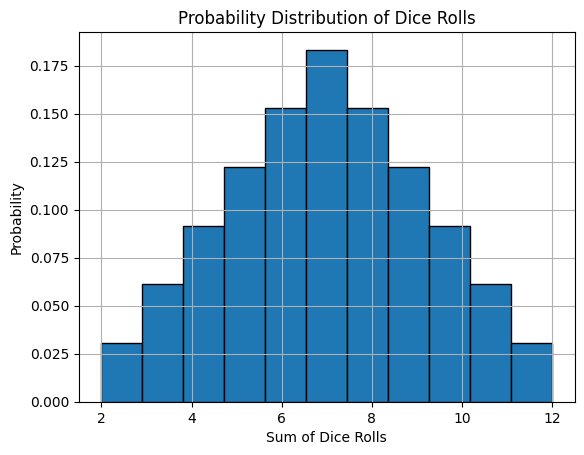

7.0


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def expected_value(num_dice, num_sides, face_values):
    # Calculate the expected value of a roll with the given dice
    expected_value = 0

    # Iterate over each type of dice
    for i in range(len(num_dice)):
        # Calculate the expected value of a single roll of the current dice type
        expected_single_roll = sum(face_values[i]) / num_sides[i]

        # Add the expected value of the current dice type multiplied by the number of dice of this type
        expected_value += num_dice[i] * expected_single_roll

    # Return the total expected value
    return expected_value

def plot_probability_distribution(num_dice, num_sides, face_values):
    
    iter_args = []
    for i in range(len(num_dice)):
        counter = num_dice[i]
        while counter > 0:
            iter_args.append(face_values[i])
            counter -= 1

    # Generate all possible outcomes
    all_outcomes = [sum(combination) for combination in itertools.product(*iter_args)]

    # Create a histogram
    plt.hist(all_outcomes, bins=max(all_outcomes)-min(all_outcomes)+1, density=True, edgecolor='black')
    plt.xlabel('Sum of Dice Rolls')
    plt.ylabel('Probability')
    plt.title('Probability Distribution of Dice Rolls')
    plt.grid(True)
    plt.show()
    print(expected_value(num_dice, num_sides, face_values))

# Test the function
num_dice = [2]
num_sides = [6]
face_values = [[1,2,3,4,5,6]]

plot_probability_distribution(num_dice, num_sides, face_values)